# Table of contents
- # [Data Analysis](#Data-Analysis)
- # [Preprocessing](#Preprocessing)

## About the Data set
    This dataset gives the information realated to heart disease. Dataset contain 13 columns, target is the class variable which is affected by other 12 columns. Here the aim is to classify the target variable to (disease\non disease) using different machine learning algorithm and findout which algorithm suitable for this dataset.

    **Attribute Information**

    Age (age in years)
    Sex (1 = male; 0 = female)
    CP (chest pain type)
    TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
    CHOL (serum cholestoral in mg/dl)
    FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    RESTECH (resting electrocardiographic results)
    THALACH (maximum heart rate achieved)
    EXANG (exercise induced angina (1 = yes; 0 = no))
    OLDPEAK (ST depression induced by exercise relative to rest)
    SLOPE (the slope of the peak exercise ST segment)
    CA (number of major vessels (0-3) colored by flourosopy)
    THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)
    TARGET (1 or 0)

# Data Analysis

In [17]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
import pandas_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier


In [18]:
data = pd.read_csv('heart1.csv')
data.head()

,age,sex,chestpain,trestbps,cholesterol,fastbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1025 non-null   int64  
 1   sex          1025 non-null   int64  
 2   chestpain    1025 non-null   int64  
 3   trestbps     1025 non-null   int64  
 4   cholesterol  1025 non-null   int64  
 5   fastbs       1025 non-null   int64  
 6   restecg      1025 non-null   int64  
 7   thalach      1025 non-null   int64  
 8   exang        1025 non-null   int64  
 9   oldpeak      1025 non-null   float64
 10  slope        1025 non-null   int64  
 11  ca           1025 non-null   int64  
 12  thal         1025 non-null   int64  
 13  target       1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


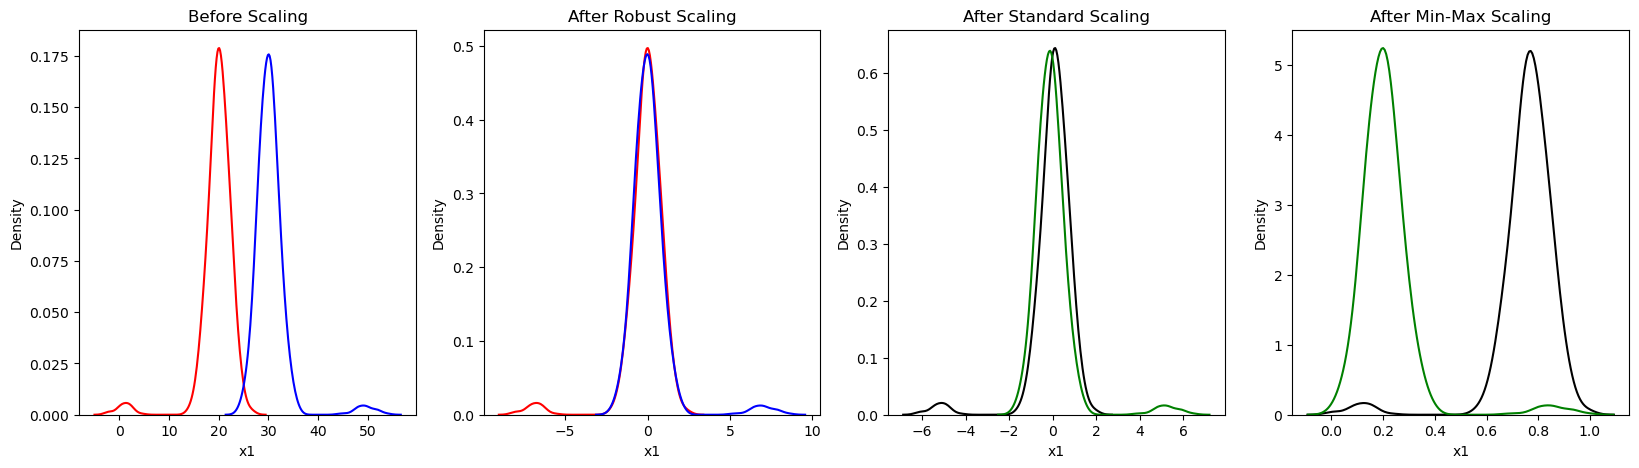

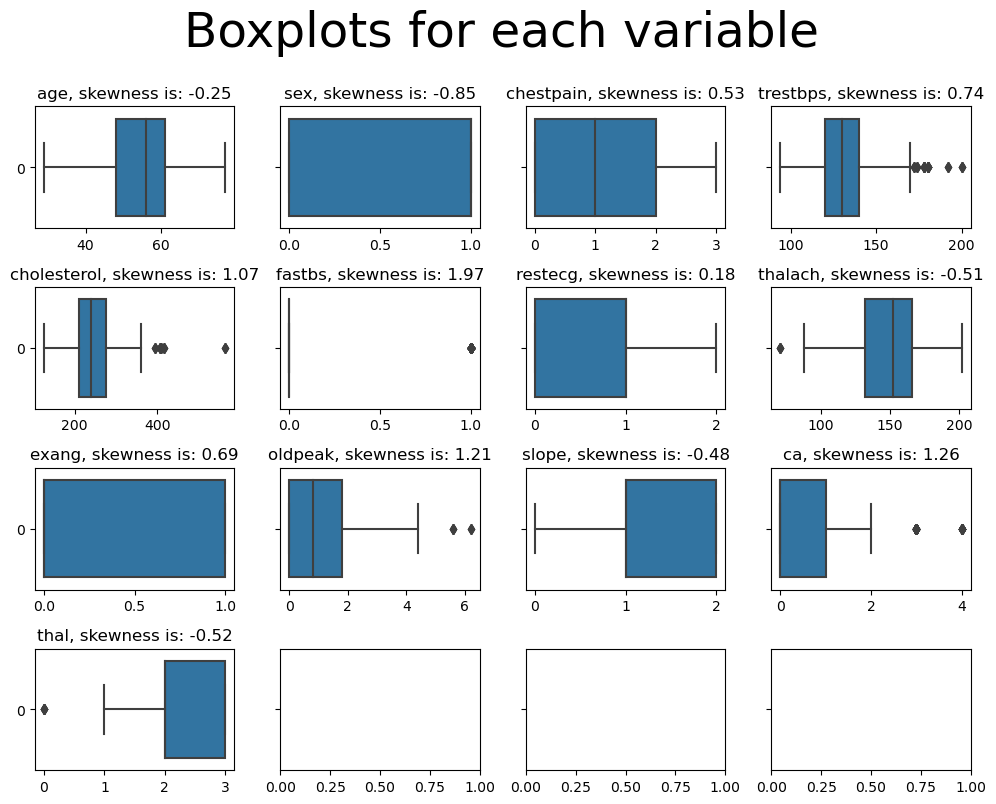

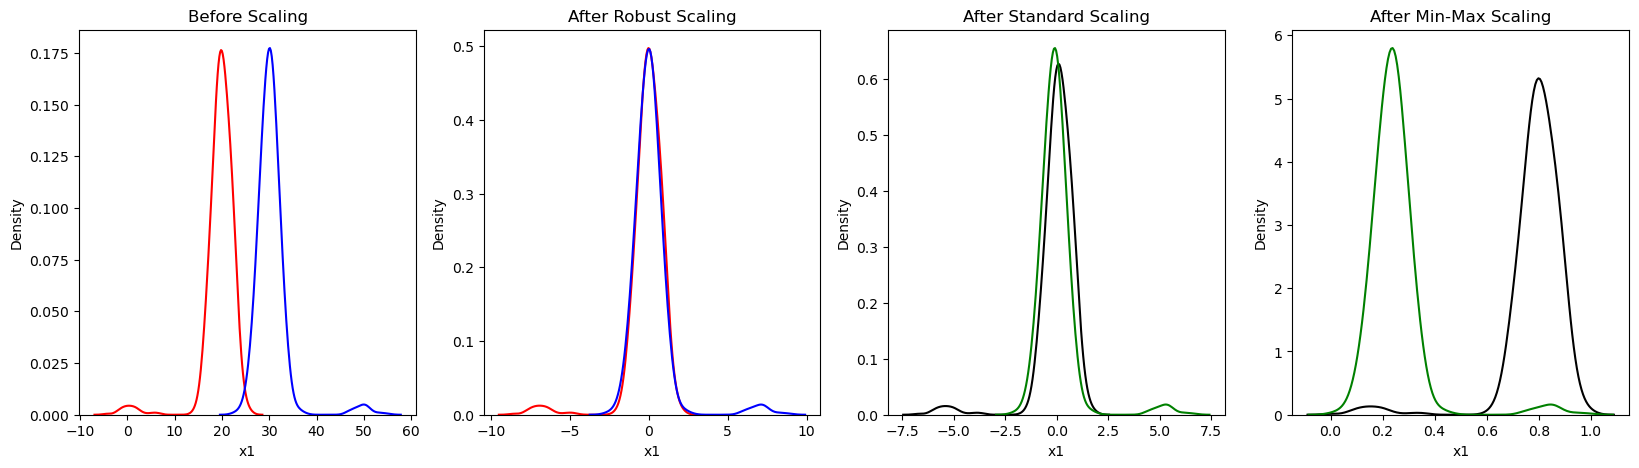

In [20]:
# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal
 
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])
 
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])
 
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])
 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
 
sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')
 
sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')
 
sns.kdeplot(standard_df['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')
 
sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='g')
plt.show()

In [21]:
data.head()

,age,sex,chestpain,trestbps,cholesterol,fastbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Preprocessing

In [22]:
labels=["Healthy","Heart Disease"]

healthy_or_not = data['target'].value_counts().tolist()
values = [healthy_or_not[0], healthy_or_not[1]]

fig = px.pie(values=data['target'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Healthy vs Heart Disease")
fig.show()

## Checking for outliers

In [23]:
data.keys()

Index(['age', 'sex', 'chestpain', 'trestbps', 'cholesterol', 'fastbs',
       'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal',
       'target'],
      dtype='object')

In [24]:
numerical_columns = list(data.loc[:,['age', 'sex', 'chestpain', 'trestbps', 'cholesterol', 'fastbs',
       'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']])


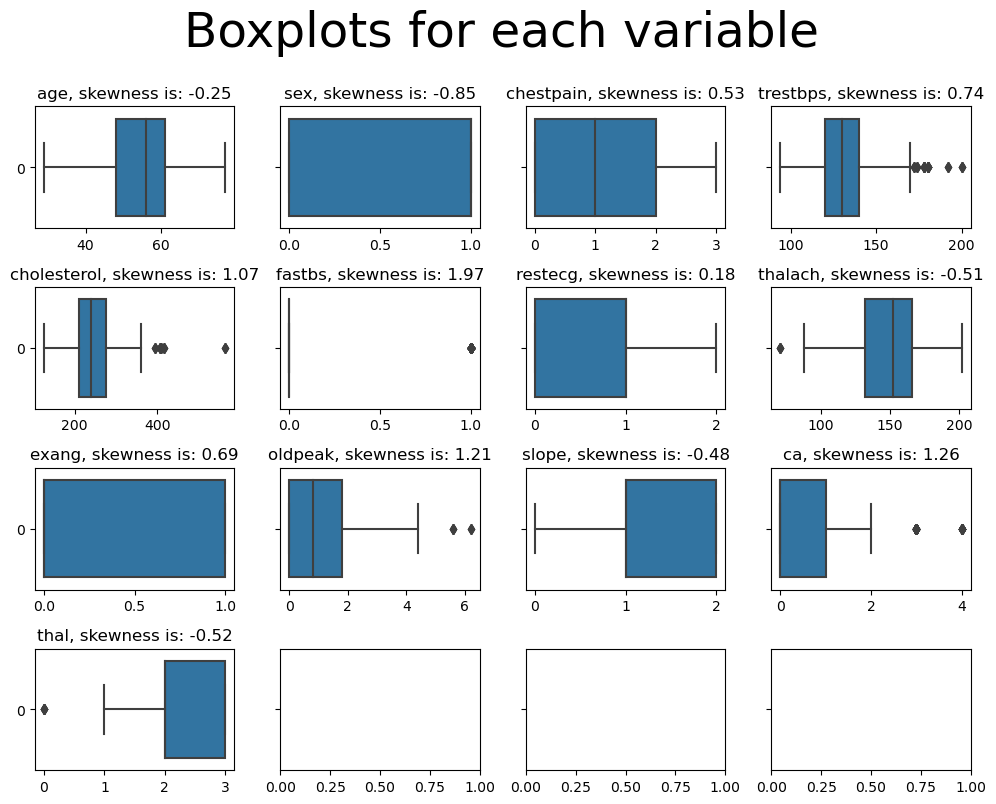

In [25]:
# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(10,8))
    fig.suptitle(suptitle,y=1, size=35)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=data, columns_list=numerical_columns, rows=4, cols=4, suptitle='Boxplots for each variable')
plt.tight_layout()

## Outlier analysis


In [26]:
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
    
    return multiple_outliers

## Drop outliers

In [27]:
# detecting outliers
Outliers_IQR = IQR_method(data,1,numerical_columns)

# dropping outliers
df = data.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 7


In [28]:
df = pd.get_dummies(df, drop_first=True)

In [29]:
df_Feat = data
df_OutFeat = df

## Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler

# Creating function for scaling
def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    
    return df

In [31]:
col_names = numerical_columns
df_Feat = Standard_Scaler (df_Feat, col_names)
df_OutFeat = Standard_Scaler (df_OutFeat, col_names)

## Exporting preprocessed data to csv

In [32]:
df_Feat.to_csv(r'dataFeat.csv', index=False)
df_OutFeat.to_csv(r'dataOutFeat.csv', index=False)